In [ ]:
import pickle ## for object serialization and deserialization.
import seaborn as sns ## for statistical data visualization.
import pandas as pd ## for data manipulation and analysis.
import numpy as np ## for scientific computing with arrays and matrices.
import matplotlib.pyplot as plt ## for creating visualizations and graphs.
import random ##  for generating random numbers and performing random selections.
from sklearn.utils import shuffle
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential ##  for building sequential deep learning models.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout ## for constructing deep learning models.

from tensorflow.keras.optimizers import Adam, Adagrad, Adamax, Nadam ## optimizers to train deep learning models.
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, TensorBoard ## for additional functionality during model training.
import tensorflow as tf ## library for deep learning and machine learning tasks.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Some functions

 Defining a specific convolutional neural network (CNN) model architecture(average pooling without dropout)

In [ ]:
def avrg_pool_wt_dropout(optimizer):
  model = Sequential()
  model.add(Conv2D(filters = 6, kernel_size = (5, 5), activation = 'relu', input_shape = (32, 32, 1)))
  model.add(AveragePooling2D())

  model.add(Conv2D(filters = 16, kernel_size = (5, 5), activation = 'relu'))
  model.add(AveragePooling2D())

  model.add(Flatten())

  model.add(Dense(units = 120, activation = 'relu'))
  model.add(Dense(units = 84, activation = 'relu'))
  model.add(Dense(units = 43, activation = 'softmax'))

  model.compile(
      loss = 'sparse_categorical_crossentropy',
      optimizer = optimizer,
      metrics = ['accuracy']
      )

  return model


 Defining a specific convolutional neural network (CNN) model architecture(maxpooling with dropout)

In [ ]:
def max_pool_w_dropout(optimizer):
  model = Sequential()
  model.add(Conv2D(filters = 6, kernel_size = (5, 5), activation = 'relu', input_shape = (32, 32, 1)))
  model.add(MaxPooling2D())

  model.add(Conv2D(filters = 16, kernel_size = (5, 5), activation = 'relu'))
  model.add(MaxPooling2D())

  model.add(Flatten())

  model.add(Dense(units = 120, activation = 'relu'))
  model.add(Dense(units = 84, activation = 'relu'))
  model.add(Dropout(0.02))#(0.2)
  model.add(Dense(units = 43, activation = 'softmax'))

  model.compile(
      loss = 'sparse_categorical_crossentropy',
      optimizer = optimizer,
      metrics = ['accuracy']
      )

  return model


Defining a function that performs the training of a given model on the provided data.

In [ ]:
def run_model(model, x_train, y_train, x_validation, y_validation, b_size, epochs, check_pointer, early_stopping):

    history = model.fit(
      x_train,
      y_train,
      batch_size = b_size,
      epochs = epochs,
      verbose = 1,
      validation_data = (x_validation, y_validation),
      callbacks = [check_pointer, early_stopping]
      )
    return history

Creating early to prevent overfitting and improve generalization performance.

In [ ]:
def create_early_stopping(verbose, patience):

  early_stopping = EarlyStopping(
      monitor = 'val_loss',
      mode = 'min',
      verbose = 1,
      patience = patience
  )
  return early_stopping

Function for checkpoint to save models best performance

In [ ]:
def create_check_point(model):
  check_pointer = ModelCheckpoint(
      filepath = 'traffic-signs-data.hdf5',
      verbose = 1,
      save_best_only = True
  )
  return check_pointer

Function to visualize and display the training and validation performance of a model.

In [ ]:
def show_details(history, model, patience, batch_size, epochs):
  model_name = model,
  f = plt.figure(figsize = (30,4))
  st = f.suptitle(model, fontsize = "x-large")
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(accuracy))
  print('Training and Validation accuracy with using {} with patience: {}, batch_size: {} and epochs: {}'.format(model_name, patience, batch_size, epochs))
  plt.subplot(1,2,1)

  plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
  plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.legend()

  print('Training and Validation loss with using {} with patience: {}, batch_size: {} and epochs: {}'.format(model_name, patience, batch_size, epochs))

  plt.subplot (1,2,2)
  plt.plot(epochs, loss, 'ro', label = 'Training loss')
  plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
  plt.title('Training and Validation loss')
  plt.legend()
  plt.show()

## Importing our dataset

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/traffic-signs-data (2)/train.p', mode = 'rb') as training_data:
  train = pickle.load(training_data)

with open('/content/drive/MyDrive/Colab Notebooks/traffic-signs-data (2)/valid.p', mode = 'rb') as validation_data:
  valid = pickle.load(validation_data)

with open('/content/drive/MyDrive/Colab Notebooks/traffic-signs-data (2)/test.p', mode = 'rb') as testing_data:
  test = pickle.load(testing_data)

Assigning values to several variables.

In [ ]:
x_train, y_train = train['features'], train['labels']

x_validation, y_validation = valid['features'], valid['labels']

x_test, y_test = test['features'], test['labels']

Checking shape

In [ ]:
x_train.shape

(34799, 32, 32, 3)

 Visualizing an image from the training dataset and display its corresponding label.

36

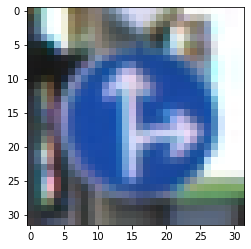

In [ ]:
i = 1032
plt.imshow(x_train[i])

y_train[i]

shuffling x_train and y_train (By shuffling the training data, introducing randomness into the order of the samples. This can be beneficial during model training as it prevents any potential bias that may arise from the original ordering of the data. Shuffling the data helps in achieving a more representative and diverse distribution of samples during each training epoch.)

In [ ]:
x_train, y_train = shuffle(x_train, y_train)

Converting RGB images to grayscale by summing the color channels and dividing by 3.

<b>Converting RGB images to grayscale can be useful in certain scenarios, as it reduces the dimensionality of the data and removes color information.<b>

In [ ]:
x_train_gray = np.sum(x_train / 3, axis = 3, keepdims = True)
x_test_gray = np.sum(x_test / 3, axis = 3, keepdims = True)
x_validation_gray = np.sum(x_validation / 3, axis = 3, keepdims = True)

In [ ]:
x_train_gray.shape ## checking for its shape and dimension

(34799, 32, 32, 1)

## Normalization

Normalizing the grayscale images by subtracting 128 and dividing by 128.

<b>Normalization is a common preprocessing step in machine learning tasks. It helps to ensure that the input features are on a similar scale, which can improve the model's convergence and performance.<b>

In [ ]:
x_train_gray_norm = (x_train_gray - 128) / 128
x_test_gray_norm = (x_test_gray - 128) / 128
x_validation_gray_norm = (x_validation_gray - 128) / 128

 Displaying a grayscale image and its corresponding original RGB image

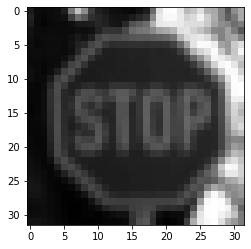

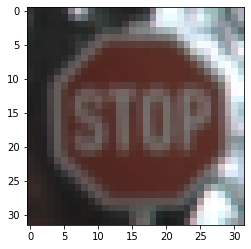

In [ ]:
i = 630

plt.imshow(x_train_gray[i].squeeze(), cmap = 'gray')

plt.figure()
plt.imshow(x_train[i])

In [ ]:
x_train_gray_norm.shape ## checking for shape

(34799, 32, 32, 1)

## Model training. Adagrad, AveragePooling without Dropouts

In [ ]:
cnn_adagrad = avrg_pool_wt_dropout(
    Adagrad(learning_rate = 0.01)
)

In [ ]:
## including patience, batchsize, epochs values
patience = [40, 50 ,60]
batch_size = [500]
epochs = [100]

In [ ]:
##  performing model training with different combinations of patience, batch_size, and epochs.
for a, b, c in zip(patience, batch_size, epochs):
  check_point = create_check_point(
      model = cnn_adagrad
    )

  early_stop = create_early_stopping(
      verbose = 1,
      patience = a
      )
  history_adagrad = run_model(
    model = cnn_adagrad,
    x_train = x_train_gray_norm,
    y_train = y_train,
    x_validation = x_validation_gray_norm,
    y_validation = y_validation,
    b_size = b,
    epochs = c,
    check_pointer = check_point,
    early_stopping = early_stop
    )
  early_stop = create_early_stopping(
      verbose = 1,
      patience
  )

Epoch 1/100
70/70 [==============================] - ETA: 0s - loss: 3.6088 - accuracy: 0.0691
Epoch 1: val_loss improved from inf to 3.56774, saving model to traffic-signs-data.hdf5
70/70 [==============================] - 1s 10ms/step - loss: 3.6088 - accuracy: 0.0691 - val_loss: 3.5677 - val_accuracy: 0.0814
Epoch 2/100
70/70 [==============================] - ETA: 0s - loss: 3.4359 - accuracy: 0.0938
Epoch 2: val_loss improved from 3.56774 to 3.48339, saving model to traffic-signs-data.hdf5
70/70 [==============================] - 0s 6ms/step - loss: 3.4359 - accuracy: 0.0938 - val_loss: 3.4834 - val_accuracy: 0.0848
Epoch 3/100
66/70 [===========================>..] - ETA: 0s - loss: 3.3079 - accuracy: 0.1251
Epoch 3: val_loss improved from 3.48339 to 3.41461, saving model to traffic-signs-data.hdf5
70/70 [==============================] - 0s 6ms/step - loss: 3.3033 - accuracy: 0.1263 - val_loss: 3.4146 - val_accuracy: 0.1138
Epoch 4/100
67/70 [===========================>..] - ET

In [ ]:
## saving trained model
model_adagrad = cnn_adagrad.to_json()
with open('traffic-signs-data1.json', 'w') as json_file:
  json_file.write(model_adagrad)

In [ ]:
## Evaluating the trained model on the test dataset and printing the test accuracy.
score_adagrad = cnn_adagrad.evaluate(x_test_gray_norm, y_test, verbose = 1)
print('Test accuracy: {:.4f}'.format(score_adagrad[1]))

395/395 [==============================] - 1s 3ms/step - loss: 1.3124 - accuracy: 0.7854
Test accuracy: 0.7854


In [ ]:
metrics_adagrad = pd.DataFrame(history_adagrad.history) ## creating a pandas DataFrame to store the training history metrics of the model

In [ ]:
metrics_adagrad ## checking metrics

loss  accuracy  val_loss  val_accuracy
0   3.608821  0.069140  3.567739      0.081406
1   3.435913  0.093825  3.483387      0.084807
2   3.303257  0.126325  3.414614      0.113832
3   3.166318  0.156527  3.331949      0.156463
4   2.983023  0.200724  3.095111      0.184807
..       ...       ...       ...           ...
87  0.164690  0.961723  0.924351      0.790249
88  0.160696  0.962499  0.938946      0.789342
89  0.159928  0.963045  1.005110      0.772336
90  0.157306  0.964338  0.956627      0.780272
91  0.155022  0.964511  0.948591      0.782086

[92 rows x 4 columns]

# Adagrad Metrics

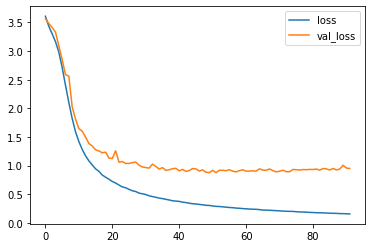

In [ ]:
metrics_adagrad[["loss","val_loss"]].plot() ## plotting the training and validation loss metrics

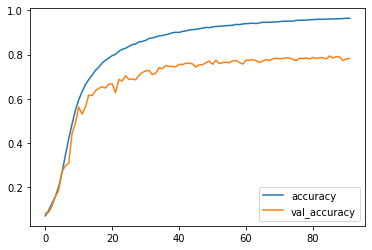

In [ ]:
metrics_adagrad[["accuracy","val_accuracy"]].plot() ## plotting the training and validation accuracy metrics

In [ ]:
predicted_class_adagrad = np.argmax(cnn_adagrad.predict(x_test_gray_norm), axis = -1) ## making predictions using the model on the test dataset

y_true_adagrad = y_test

395/395 [==============================] - 1s 2ms/step


In [ ]:
print(classification_report(y_true_adagrad, predicted_class_adagrad)) ## printing classification report for predicted class labels

              precision    recall  f1-score   support

           0       0.25      0.13      0.17        60
           1       0.74      0.88      0.80       720
           2       0.77      0.73      0.75       750
           3       0.74      0.77      0.75       450
           4       0.75      0.80      0.77       660
           5       0.77      0.76      0.77       630
           6       0.76      0.71      0.74       150
           7       0.71      0.69      0.70       450
           8       0.70      0.71      0.71       450
           9       0.90      0.91      0.90       480
          10       0.94      0.93      0.94       660
          11       0.79      0.83      0.81       420
          12       0.82      0.88      0.85       690
          13       0.91      0.96      0.94       720
          14       0.83      0.83      0.83       270
          15       0.67      0.67      0.67       210
          16       0.97      0.97      0.97       150
          17       0.97    

# Checking for the results and model is working

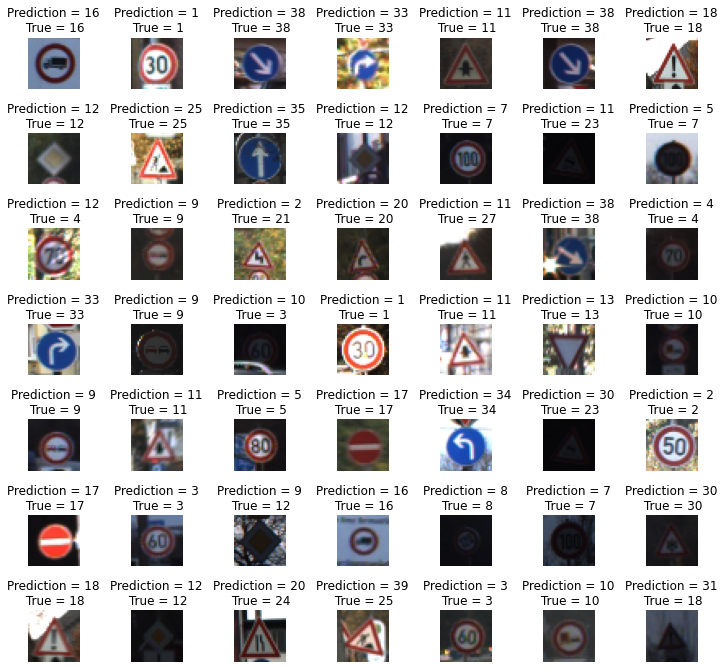

In [ ]:
## creating a grid of subplots to display a selection of test images, along with their predicted class labels and true labels.

L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L * W):
  axes[i].imshow(x_test[i])
  axes[i].set_title("Prediction = {}\n True = {}".format(predicted_class_adagrad[i], y_true_adagrad[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace = 1)

# Training loss Validation loss graph, Training and Validation accuracy

Training and Validation accuracy with using (<keras.engine.sequential.Sequential object at 0x7f665e1b6640>,) with patience: 40, batch_size: 500 and epochs: range(0, 92)
Training and Validation loss with using (<keras.engine.sequential.Sequential object at 0x7f665e1b6640>,) with patience: 40, batch_size: 500 and epochs: range(0, 92)


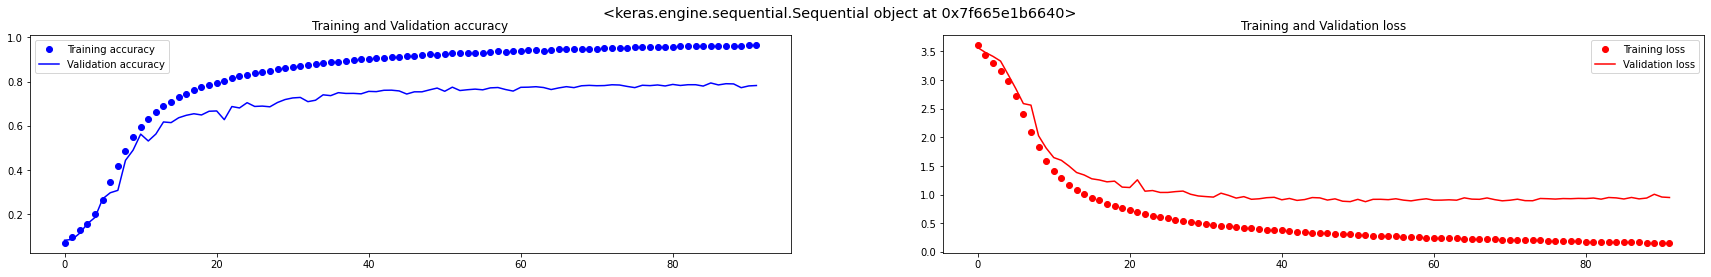

In [ ]:
##  visually comparing the model's performance across different hyperparameter combinations and assessing the impact of these hyperparameters on the training process.
for a, b, c in zip(patience, batch_size, epochs):
  show_details(
        history = history_adagrad,
        model = cnn_adagrad,
        patience = a,
        batch_size = b,
        epochs = c
        )

## Adagrad. MaxPooling with DropOuts

In [ ]:
## training Adagrad with MaxPooling with dropouts
cnn_adagrad_max = max_pool_w_dropout(
    Adagrad(learning_rate = 0.01)
)

In [ ]:
##  creating a checkpoint, an early stopping callback, and running a model training using the specified parameters.
for a, b, c in zip(patience, batch_size, epochs):
  check_point = create_check_point(
      model = cnn_adagrad_max
    )

  early_stop = create_early_stopping(
      verbose = 1,
      patience = a
      )
  history_adagrad_max = run_model(
    model = cnn_adagrad_max,
    x_train = x_train_gray_norm,
    y_train = y_train,
    x_validation = x_validation_gray_norm,
    y_validation = y_validation,
    b_size = b,
    epochs = c,
    check_pointer = check_point,
    early_stopping = early_stop
    )


Epoch 1/100
69/70 [============================>.] - ETA: 0s - loss: 3.6524 - accuracy: 0.0611
Epoch 1: val_loss improved from inf to 3.62260, saving model to traffic-signs-data.hdf5
70/70 [==============================] - 1s 10ms/step - loss: 3.6514 - accuracy: 0.0611 - val_loss: 3.6226 - val_accuracy: 0.0567
Epoch 2/100
70/70 [==============================] - ETA: 0s - loss: 3.4103 - accuracy: 0.0954
Epoch 2: val_loss improved from 3.62260 to 3.51336, saving model to traffic-signs-data.hdf5
70/70 [==============================] - 0s 6ms/step - loss: 3.4103 - accuracy: 0.0954 - val_loss: 3.5134 - val_accuracy: 0.0923
Epoch 3/100
59/70 [========================>.....] - ETA: 0s - loss: 3.2903 - accuracy: 0.1318
Epoch 3: val_loss improved from 3.51336 to 3.41157, saving model to traffic-signs-data.hdf5
70/70 [==============================] - 0s 7ms/step - loss: 3.2807 - accuracy: 0.1346 - val_loss: 3.4116 - val_accuracy: 0.1231
Epoch 4/100
61/70 [=========================>....] - ET

In [ ]:
## saving the architecture of the cnn_adagrad model to a JSON file named 'traffic-signs-data.json'
model_adagrad_max = cnn_adagrad_max.to_json()
with open('traffic-signs-data1.json', 'w') as json_file:
  json_file.write(model_adagrad_max)

In [ ]:
## Evaluating the trained model on the test dataset and printing the test accuracy.
score_adagrad_max = cnn_adagrad_max.evaluate(x_test_gray_norm, y_test, verbose = 1)
print('Test accuracy: {:.4f}'.format(score_adagrad_max[1]))

395/395 [==============================] - 1s 3ms/step - loss: 0.7408 - accuracy: 0.8702
Test accuracy: 0.8702


Training and Validation accuracy with using (<keras.engine.sequential.Sequential object at 0x7f66cae7caf0>,) with patience: 40, batch_size: 500 and epochs: range(0, 100)
Training and Validation loss with using (<keras.engine.sequential.Sequential object at 0x7f66cae7caf0>,) with patience: 40, batch_size: 500 and epochs: range(0, 100)


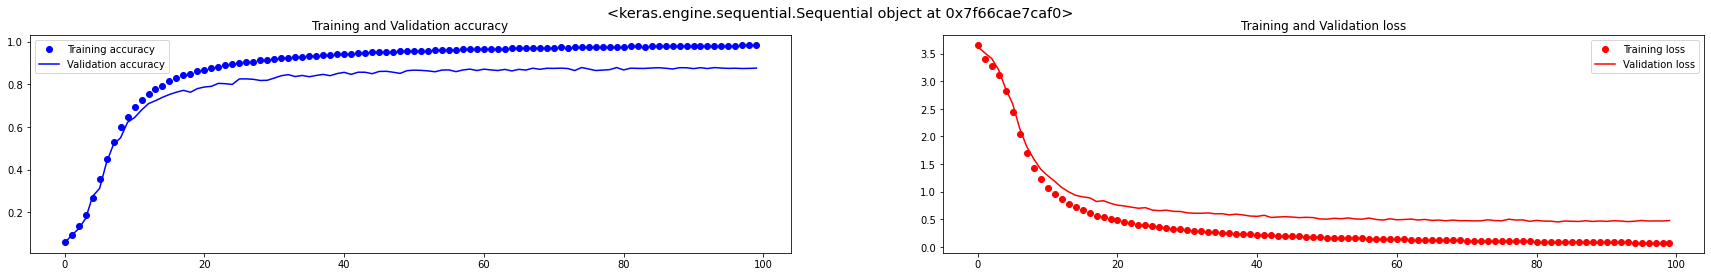

In [ ]:
for a, b, c in zip(patience, batch_size, epochs):

  show_details(
        history = history_adagrad_max,
        model = cnn_adagrad_max,
        patience = a,
        batch_size = b,
        epochs = c
        )

In [ ]:
## calculating the predicted class labels using the cnn_nadamax_max model for the test dataset
predicted_class_adagrad_max = np.argmax(cnn_adagrad_max.predict(x_test_gray_norm), axis = -1)

y_true_adagrad_max = y_test

395/395 [==============================] - 1s 2ms/step


In [ ]:
##  generating a classification report based on the true class labels
print(classification_report(y_true_adagrad_max, predicted_class_adagrad_max))

              precision    recall  f1-score   support

           0       0.78      0.52      0.62        60
           1       0.84      0.90      0.87       720
           2       0.83      0.92      0.88       750
           3       0.82      0.89      0.85       450
           4       0.87      0.85      0.86       660
           5       0.83      0.85      0.84       630
           6       0.96      0.74      0.83       150
           7       0.90      0.75      0.82       450
           8       0.82      0.84      0.83       450
           9       0.97      0.94      0.95       480
          10       0.98      0.97      0.97       660
          11       0.87      0.90      0.89       420
          12       0.91      0.96      0.94       690
          13       0.97      0.99      0.98       720
          14       0.87      0.94      0.90       270
          15       0.84      0.90      0.86       210
          16       0.97      0.99      0.98       150
          17       0.99    

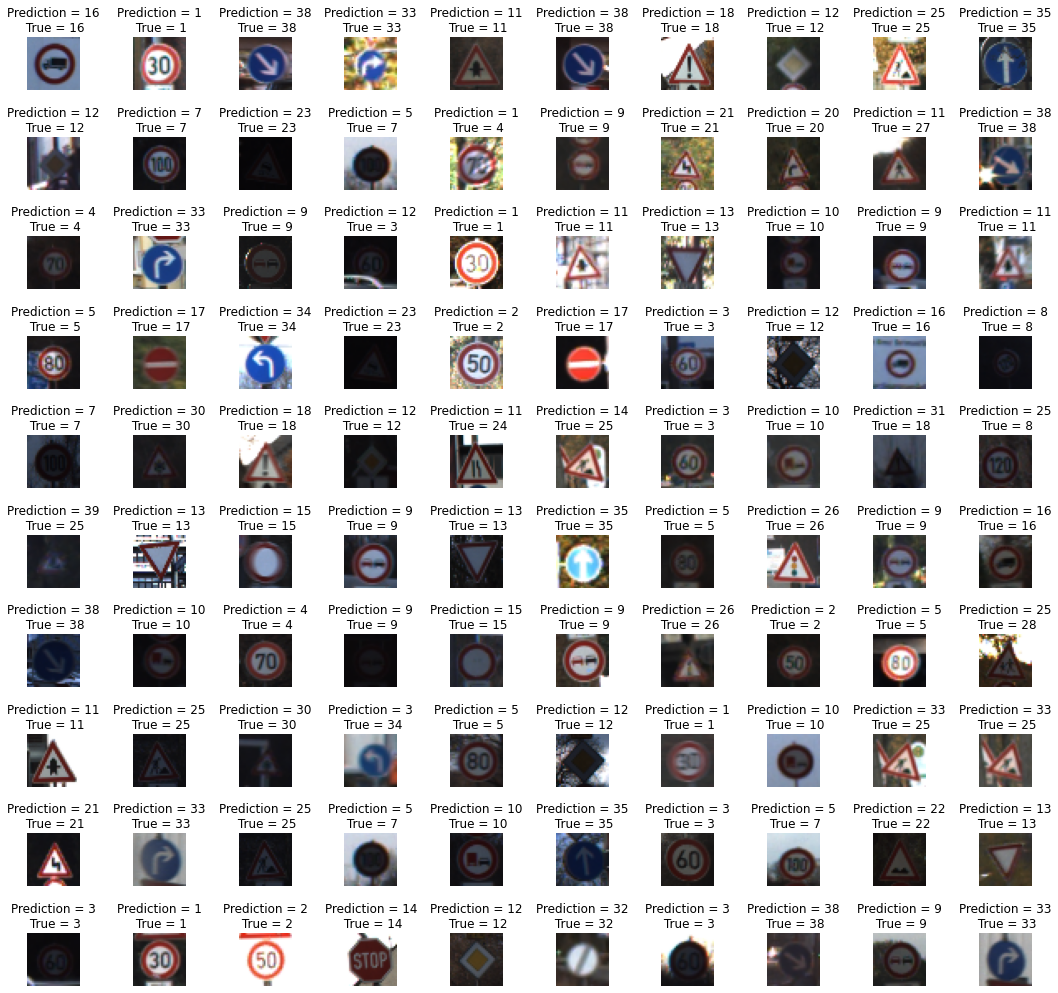

In [ ]:
##  displaying a grid of images from the x_test dataset along with the corresponding predicted class label
L = 10
W = 10

fig, axes = plt.subplots(L, W, figsize = (18, 18))
axes = axes.ravel()

for i in np.arange(0, L * W):
  axes[i].imshow(x_test[i])
  axes[i].set_title("Prediction = {}\n True = {}".format(predicted_class_adagrad_max[i], y_true_adagrad_max[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace = 1)

## Adamax. AveragePooling without DropOuts

In [ ]:
## training Adamax with AveragePooling without dropouts
cnn_adamax = avrg_pool_wt_dropout(
    Adamax(learning_rate = 0.01)
)

In [ ]:
##  creating a checkpoint, an early stopping callback, and running a model training using the specified parameters.
for a, b, c in zip(patience, batch_size, epochs):
  check_point = create_check_point(
      model = cnn_adamax
    )

  early_stop = create_early_stopping(
      verbose = 1,
      patience = a
      )
  history_adamax = run_model(
    model = cnn_adamax,
    x_train = x_train_gray_norm,
    y_train = y_train,
    x_validation = x_validation_gray_norm,
    y_validation = y_validation,
    b_size = b,
    epochs = c,
    check_pointer = check_point,
    early_stopping = early_stop
    )


Epoch 1/100
65/70 [==========================>...] - ETA: 0s - loss: 2.5755 - accuracy: 0.3038
Epoch 1: val_loss improved from inf to 1.27998, saving model to traffic-signs-data.hdf5
70/70 [==============================] - 1s 10ms/step - loss: 2.4900 - accuracy: 0.3250 - val_loss: 1.2800 - val_accuracy: 0.6120
Epoch 2/100
68/70 [============================>.] - ETA: 0s - loss: 0.8061 - accuracy: 0.7634
Epoch 2: val_loss improved from 1.27998 to 0.70523, saving model to traffic-signs-data.hdf5
70/70 [==============================] - 0s 7ms/step - loss: 0.8016 - accuracy: 0.7652 - val_loss: 0.7052 - val_accuracy: 0.7925
Epoch 3/100
61/70 [=========================>....] - ETA: 0s - loss: 0.4738 - accuracy: 0.8668
Epoch 3: val_loss improved from 0.70523 to 0.58014, saving model to traffic-signs-data.hdf5
70/70 [==============================] - 0s 6ms/step - loss: 0.4628 - accuracy: 0.8701 - val_loss: 0.5801 - val_accuracy: 0.8317
Epoch 4/100
64/70 [==========================>...] - ET

Training and Validation accuracy with using (<keras.engine.sequential.Sequential object at 0x7f6646962bb0>,) with patience: 40, batch_size: 500 and epochs: range(0, 51)
Training and Validation loss with using (<keras.engine.sequential.Sequential object at 0x7f6646962bb0>,) with patience: 40, batch_size: 500 and epochs: range(0, 51)


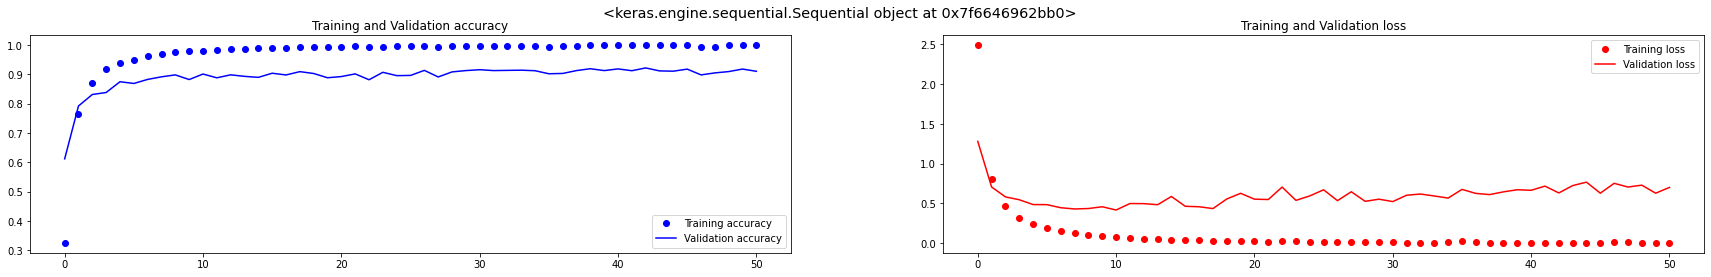

In [ ]:
## displaying details about the history, model, patience, batch size, and epochs.
for a, b, c in zip(patience, batch_size, epochs):
  show_details(
      history = history_adamax,
      model = cnn_adamax,
      patience = a,
      batch_size = b,
      epochs = c
      )

In [ ]:
## saving the architecture of the cnn_adamax model to a JSON file named 'traffic-signs-data.json'
model_adamax = cnn_adamax.to_json()
with open('traffic-signs-data1.json', 'w') as json_file:
  json_file.write(model_adamax)

In [ ]:
## evaluating the performance of the cnn_adamax_max model on the test dataset and print the test accuracy.
score_adamax = cnn_adamax.evaluate(x_test_gray_norm, y_test, verbose = 1)
print('Test accuracy: {:.4f}'.format(score_adamax[1]))

395/395 [==============================] - 1s 2ms/step - loss: 1.2763 - accuracy: 0.9036
Test accuracy: 0.9036


In [ ]:
## calculating the predicted class labels using the cnn_adamax_max model for the test dataset
predicted_class_adamax = np.argmax(cnn_adamax.predict(x_test_gray_norm), axis = -1)

y_true_adamax = y_test

395/395 [==============================] - 1s 2ms/step


In [ ]:
##  generating a classification report based on the true class labels
print(classification_report(y_true_adamax, predicted_class_adamax))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79        60
           1       0.89      0.97      0.92       720
           2       0.90      0.93      0.92       750
           3       0.94      0.94      0.94       450
           4       0.97      0.90      0.94       660
           5       0.87      0.90      0.88       630
           6       0.99      0.86      0.92       150
           7       0.88      0.86      0.87       450
           8       0.87      0.93      0.90       450
           9       0.94      0.97      0.95       480
          10       0.97      0.97      0.97       660
          11       0.94      0.86      0.90       420
          12       0.95      0.97      0.96       690
          13       0.99      0.99      0.99       720
          14       0.88      0.90      0.89       270
          15       0.94      0.83      0.88       210
          16       0.94      0.99      0.96       150
          17       0.97    

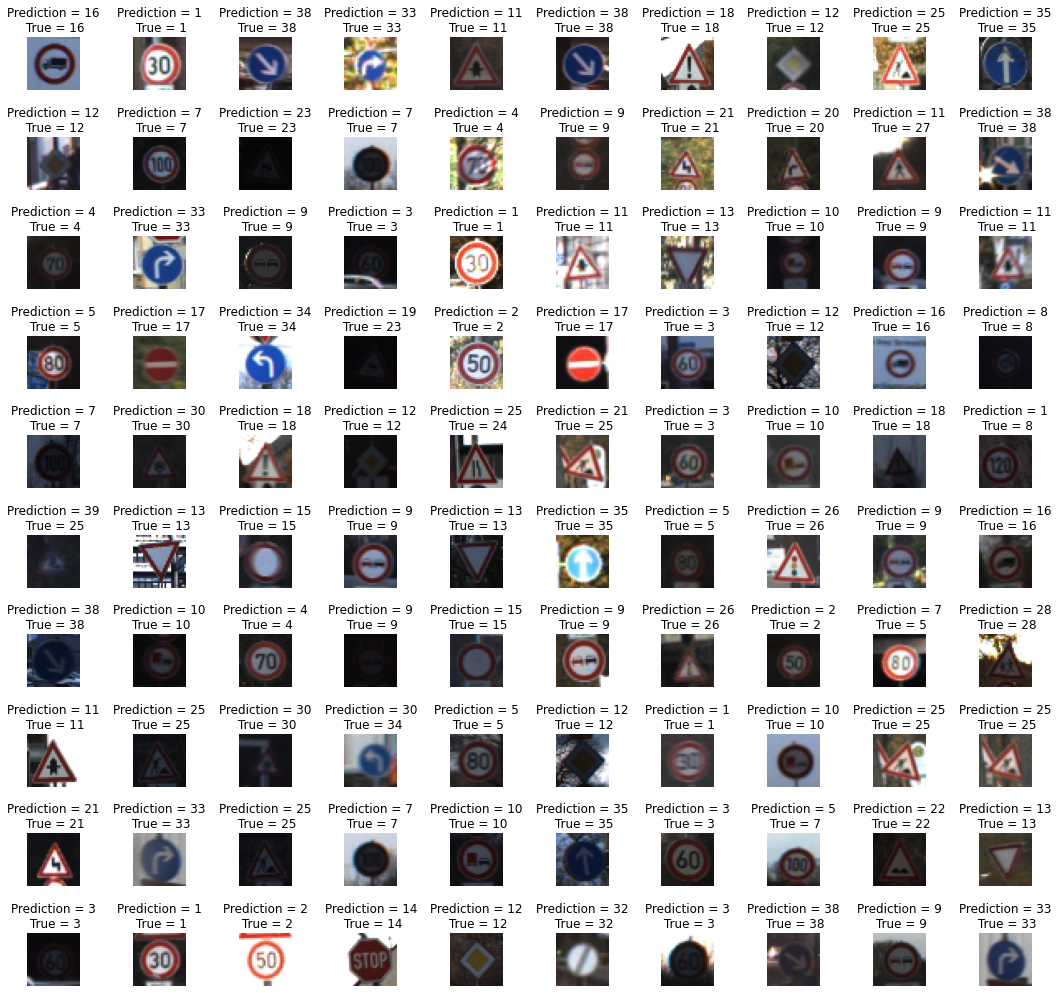

In [ ]:
##  displaying a grid of images from the x_test dataset along with the corresponding predicted class label
L = 10
W = 10

fig, axes = plt.subplots(L, W, figsize = (18, 18))
axes = axes.ravel()

for i in np.arange(0, L * W):
  axes[i].imshow(x_test[i])
  axes[i].set_title("Prediction = {}\n True = {}".format(predicted_class_adamax[i], y_true_adamax[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace = 1)

## Adamax. MaxPooling with DropOuts

In [ ]:
## training Adamax with MaxPooling without dropouts
cnn_adamax_max = max_pool_w_dropout(
    Adamax(learning_rate = 0.01)
)

In [ ]:
##  creating a checkpoint, an early stopping callback, and running a model training using the specified parameters.
for a, b, c in zip(patience, batch_size, epochs):
  check_point = create_check_point(
      model = cnn_adamax_max
    )

  early_stop = create_early_stopping(
      verbose = 1,
      patience = a
      )
  history_adamax_max = run_model(
    model = cnn_adamax_max,
    x_train = x_train_gray_norm,
    y_train = y_train,
    x_validation = x_validation_gray_norm,
    y_validation = y_validation,
    b_size = b,
    epochs = c,
    check_pointer = check_point,
    early_stopping = early_stop
    )


Epoch 1/100
68/70 [============================>.] - ETA: 0s - loss: 2.3480 - accuracy: 0.3681
Epoch 1: val_loss improved from inf to 1.10796, saving model to traffic-signs-data.hdf5
70/70 [==============================] - 1s 10ms/step - loss: 2.3168 - accuracy: 0.3759 - val_loss: 1.1080 - val_accuracy: 0.6630
Epoch 2/100
61/70 [=========================>....] - ETA: 0s - loss: 0.6359 - accuracy: 0.8157
Epoch 2: val_loss improved from 1.10796 to 0.57801, saving model to traffic-signs-data.hdf5
70/70 [==============================] - 0s 7ms/step - loss: 0.6111 - accuracy: 0.8240 - val_loss: 0.5780 - val_accuracy: 0.8429
Epoch 3/100
62/70 [=========================>....] - ETA: 0s - loss: 0.3305 - accuracy: 0.9079
Epoch 3: val_loss improved from 0.57801 to 0.44579, saving model to traffic-signs-data.hdf5
70/70 [==============================] - 0s 6ms/step - loss: 0.3260 - accuracy: 0.9100 - val_loss: 0.4458 - val_accuracy: 0.8909
Epoch 4/100
61/70 [=========================>....] - ET

In [ ]:
## saving the architecture of the cnn_adamax model to a JSON file named 'traffic-signs-data.json'
model_adamax_max = cnn_adamax_max.to_json()
with open('traffic-signs-data1.json', 'w') as json_file:
  json_file.write(model_adamax_max)

Training and Validation accuracy with using (<keras.engine.sequential.Sequential object at 0x7f66ca5ea5e0>,) with patience: 40, batch_size: 500 and epochs: range(0, 47)
Training and Validation loss with using (<keras.engine.sequential.Sequential object at 0x7f66ca5ea5e0>,) with patience: 40, batch_size: 500 and epochs: range(0, 47)


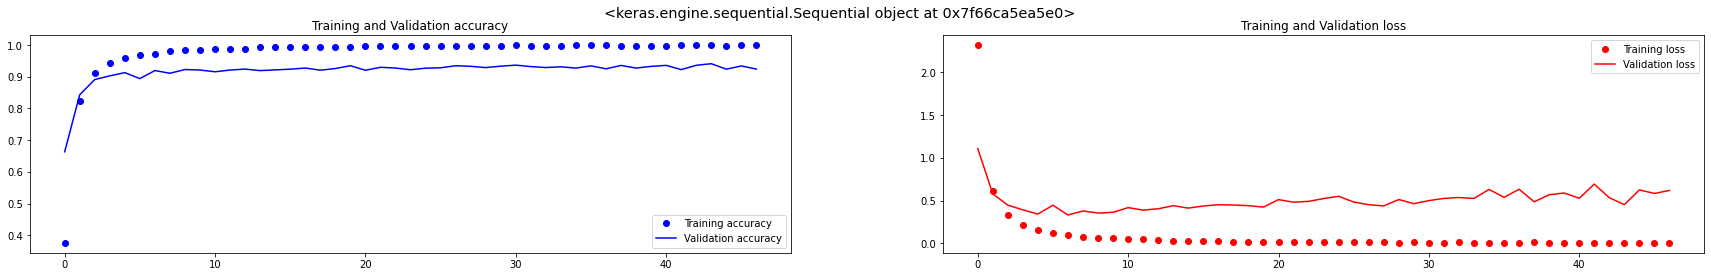

In [ ]:
## displaying details about the history, model, patience, batch size, and epochs.
for a, b, c in zip(patience, batch_size, epochs):
  show_details(
      history = history_adamax_max,
      model = cnn_adamax_max,
      patience = a,
      batch_size = b,
      epochs = c
      )

In [ ]:
## evaluating the performance of the cnn_nadamax_max model on the test dataset and print the test accuracy.
score_adamax_max = cnn_adamax_max.evaluate(x_test_gray_norm, y_test, verbose = 1)
print('Test accuracy: {:.4f}'.format(score_adamax_max[1]))

395/395 [==============================] - 1s 2ms/step - loss: 1.2416 - accuracy: 0.9128
Test accuracy: 0.9128


In [ ]:
## calculating the predicted class labels using the cnn_adamax_max model for the test dataset
predicted_class_adamax_max = np.argmax(cnn_adamax_max.predict(x_test_gray_norm), axis = -1)

y_true_adamax_max = y_test

395/395 [==============================] - 1s 2ms/step


In [ ]:
##  generating a classification report based on the true class labels
print(classification_report(y_true_adamax_max, predicted_class_adamax_max))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90        60
           1       0.93      0.96      0.95       720
           2       0.95      0.94      0.95       750
           3       0.85      0.96      0.90       450
           4       0.98      0.91      0.94       660
           5       0.82      0.93      0.87       630
           6       0.95      0.81      0.88       150
           7       0.92      0.83      0.87       450
           8       0.94      0.90      0.91       450
           9       0.94      0.94      0.94       480
          10       0.97      0.98      0.98       660
          11       0.88      0.92      0.90       420
          12       0.96      0.96      0.96       690
          13       0.97      0.99      0.98       720
          14       0.97      0.96      0.96       270
          15       0.91      0.98      0.94       210
          16       0.93      0.98      0.95       150
          17       0.99    

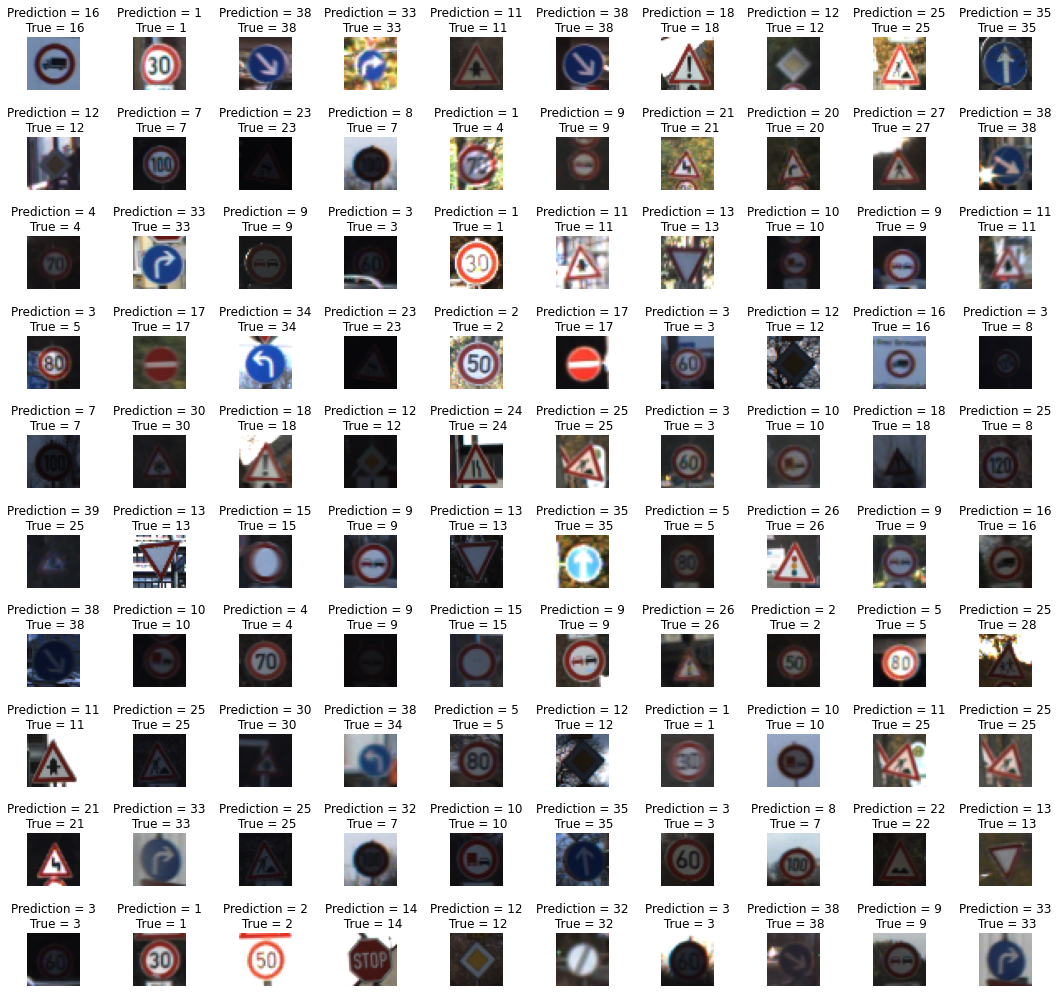

In [ ]:
##  displaying a grid of images from the x_test dataset along with the corresponding predicted class label
L = 10
W = 10

fig, axes = plt.subplots(L, W, figsize = (18, 18))
axes = axes.ravel()

for i in np.arange(0, L * W):
  axes[i].imshow(x_test[i])
  axes[i].set_title("Prediction = {}\n True = {}".format(predicted_class_adamax_max[i], y_true_adamax_max[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace = 1)

## Nadamax. AveragePooling without Dropouts

In [ ]:
## training Nadamax with AveragePooling without dropouts
cnn_nadamax = avrg_pool_wt_dropout(
    Nadam(learning_rate = 0.01)
)

In [ ]:
##  creating a checkpoint, an early stopping callback, and running a model training using the specified parameters.
for a, b, c in zip(patience, batch_size, epochs):
  check_point = create_check_point(
      model = cnn_nadamax
    )

  early_stop = create_early_stopping(
      verbose = 1,
      patience = a
      )
  history_nadamax = run_model(
    model = cnn_nadamax,
    x_train = x_train_gray_norm,
    y_train = y_train,
    x_validation = x_validation_gray_norm,
    y_validation = y_validation,
    b_size = b,
    epochs = c,
    check_pointer = check_point,
    early_stopping = early_stop
    )


Epoch 1/100
63/70 [==========================>...] - ETA: 0s - loss: 2.4413 - accuracy: 0.3370
Epoch 1: val_loss improved from inf to 1.01714, saving model to traffic-signs-data.hdf5
70/70 [==============================] - 2s 10ms/step - loss: 2.3266 - accuracy: 0.3650 - val_loss: 1.0171 - val_accuracy: 0.6932
Epoch 2/100
63/70 [==========================>...] - ETA: 0s - loss: 0.6329 - accuracy: 0.8039
Epoch 2: val_loss improved from 1.01714 to 0.64811, saving model to traffic-signs-data.hdf5
70/70 [==============================] - 1s 8ms/step - loss: 0.6107 - accuracy: 0.8105 - val_loss: 0.6481 - val_accuracy: 0.8179
Epoch 3/100
62/70 [=========================>....] - ETA: 0s - loss: 0.2825 - accuracy: 0.9174
Epoch 3: val_loss improved from 0.64811 to 0.61025, saving model to traffic-signs-data.hdf5
70/70 [==============================] - 1s 7ms/step - loss: 0.2684 - accuracy: 0.9219 - val_loss: 0.6103 - val_accuracy: 0.8363
Epoch 4/100
63/70 [==========================>...] - ET

In [ ]:
## saving the architecture of the cnn_nadamax model to a JSON file named 'traffic-signs-data.json'
model_nadamax = cnn_nadamax.to_json()
with open('traffic-signs-data1.json', 'w') as json_file:
  json_file.write(model_nadamax)

Training and Validation accuracy with using (<keras.engine.sequential.Sequential object at 0x7f66b8722970>,) with patience: 40, batch_size: 500 and epochs: range(0, 47)
Training and Validation loss with using (<keras.engine.sequential.Sequential object at 0x7f66b8722970>,) with patience: 40, batch_size: 500 and epochs: range(0, 47)


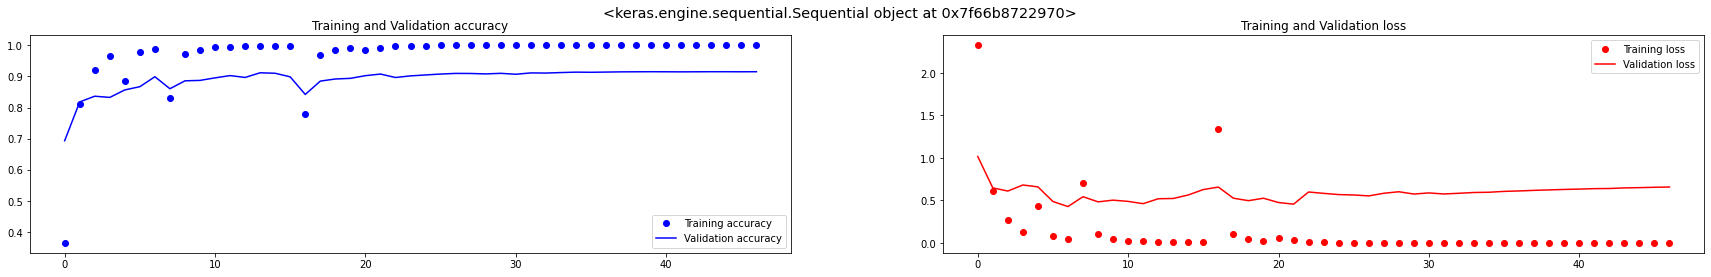

In [ ]:
## displaying details about the history, model, patience, batch size, and epochs.
for a, b, c in zip(patience, batch_size, epochs):
  show_details(
      history = history_nadamax,
      model = cnn_nadamax,
      patience = a,
      batch_size = b,
      epochs = c
      )

In [ ]:
## evaluating the performance of the cnn_nadamax_max model on the test dataset and print the test accuracy.
score_nadamax = cnn_nadamax.evaluate(x_test_gray_norm, y_test, verbose = 1)
print('Test accuracy: {:.4f}'.format(score_nadamax[1]))

395/395 [==============================] - 1s 2ms/step - loss: 1.2701 - accuracy: 0.8914
Test accuracy: 0.8914


In [ ]:
## calculating the predicted class labels using the cnn_nadamax_max model for the test dataset
predicted_class_nadamax = np.argmax(cnn_nadamax.predict(x_test_gray_norm), axis = -1)

y_true_nadamax = y_test

395/395 [==============================] - 1s 2ms/step


In [ ]:
##  generating a classification report based on the true class labels
print(classification_report(y_true_nadamax, predicted_class_nadamax))

              precision    recall  f1-score   support

           0       0.79      0.62      0.69        60
           1       0.89      0.96      0.93       720
           2       0.89      0.95      0.92       750
           3       0.86      0.88      0.87       450
           4       0.94      0.89      0.92       660
           5       0.85      0.90      0.87       630
           6       0.99      0.83      0.91       150
           7       0.92      0.84      0.88       450
           8       0.91      0.88      0.90       450
           9       0.95      0.96      0.96       480
          10       0.95      0.97      0.96       660
          11       0.88      0.88      0.88       420
          12       0.94      0.98      0.96       690
          13       0.97      0.99      0.98       720
          14       0.98      0.87      0.92       270
          15       0.93      0.89      0.91       210
          16       0.91      0.97      0.94       150
          17       0.95    

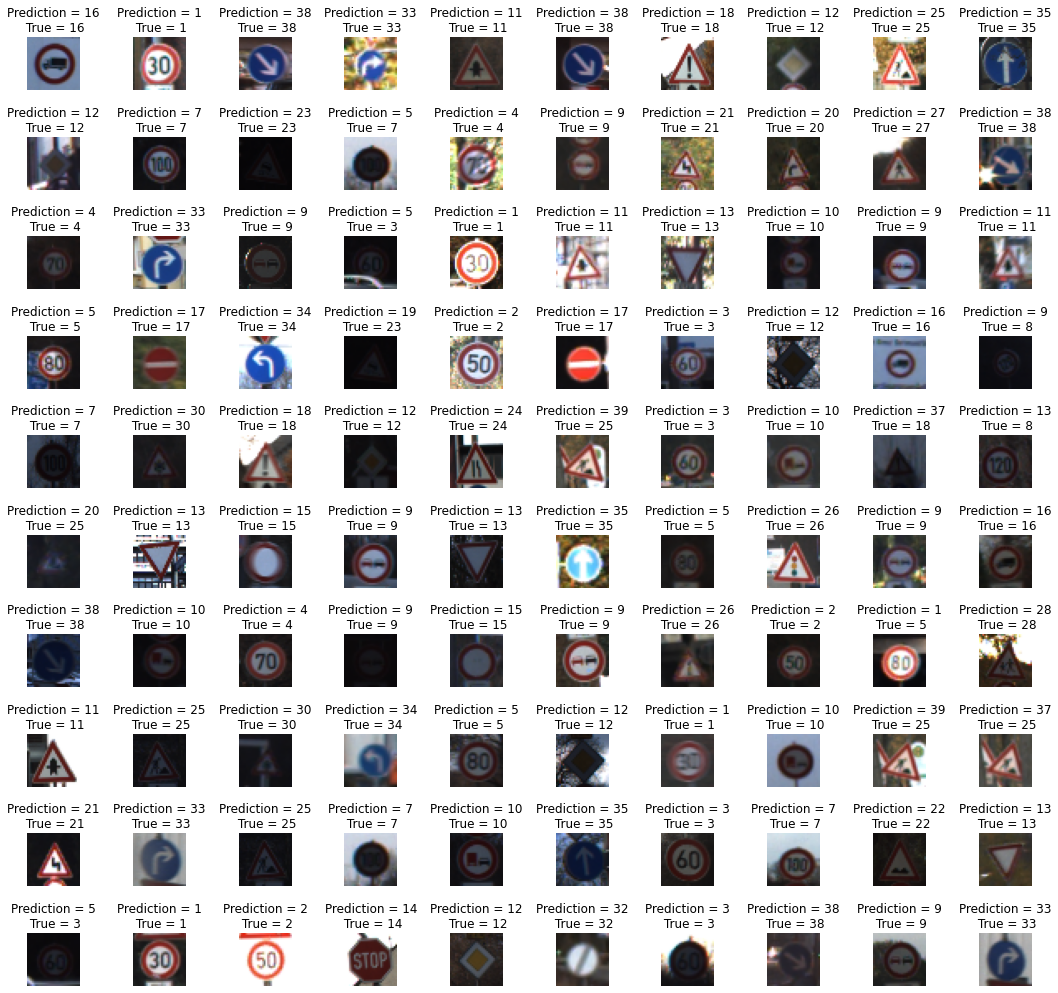

In [ ]:
##  displaying a grid of images from the x_test dataset along with the corresponding predicted class label
L = 10
W = 10

fig, axes = plt.subplots(L, W, figsize = (18, 18))
axes = axes.ravel()

for i in np.arange(0, L * W):
  axes[i].imshow(x_test[i])
  axes[i].set_title("Prediction = {}\n True = {}".format(predicted_class_nadamax[i], y_true_nadamax[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace = 1)

## Nadamax. MaxPooling with Dropouts

In [ ]:
## training Nadamax with MaxPooling with dropouts
cnn_nadamax_max = max_pool_w_dropout(
    Nadam(learning_rate = 0.01)
)

In [ ]:
##  creating a checkpoint, an early stopping callback, and running a model training using the specified parameters.
for a, b, c in zip(patience, batch_size, epochs):
  check_point = create_check_point(
      model = cnn_nadamax_max
    )

  early_stop = create_early_stopping(
      verbose = 1,
      patience = a
      )
  history_nadamax_max = run_model(
    model = cnn_nadamax_max,
    x_train = x_train_gray_norm,
    y_train = y_train,
    x_validation = x_validation_gray_norm,
    y_validation = y_validation,
    b_size = b,
    epochs = c,
    check_pointer = check_point,
    early_stopping = early_stop
    )


Epoch 1/100
66/70 [===========================>..] - ETA: 0s - loss: 2.2608 - accuracy: 0.3896
Epoch 1: val_loss improved from inf to 1.50388, saving model to traffic-signs-data.hdf5
70/70 [==============================] - 2s 11ms/step - loss: 2.1926 - accuracy: 0.4065 - val_loss: 1.5039 - val_accuracy: 0.5787
Epoch 2/100
70/70 [==============================] - ETA: 0s - loss: 0.5876 - accuracy: 0.8257
Epoch 2: val_loss improved from 1.50388 to 0.40052, saving model to traffic-signs-data.hdf5
70/70 [==============================] - 1s 7ms/step - loss: 0.5876 - accuracy: 0.8257 - val_loss: 0.4005 - val_accuracy: 0.8810
Epoch 3/100
62/70 [=========================>....] - ETA: 0s - loss: 0.1798 - accuracy: 0.9480
Epoch 3: val_loss did not improve from 0.40052
70/70 [==============================] - 0s 7ms/step - loss: 0.1748 - accuracy: 0.9499 - val_loss: 0.4878 - val_accuracy: 0.8705
Epoch 4/100
61/70 [=========================>....] - ETA: 0s - loss: 0.1794 - accuracy: 0.9471
Epoch

In [ ]:
## saving the architecture of the cnn_nadamax model to a JSON file named 'traffic-signs-data.json'
model_nadamax_max = cnn_nadamax_max.to_json()
with open('traffic-signs-data1.json', 'w') as json_file:
  json_file.write(model_nadamax_max)

Training and Validation accuracy with using (<keras.engine.sequential.Sequential object at 0x7f66b75b6550>,) with patience: 40, batch_size: 500 and epochs: range(0, 46)
Training and Validation loss with using (<keras.engine.sequential.Sequential object at 0x7f66b75b6550>,) with patience: 40, batch_size: 500 and epochs: range(0, 46)


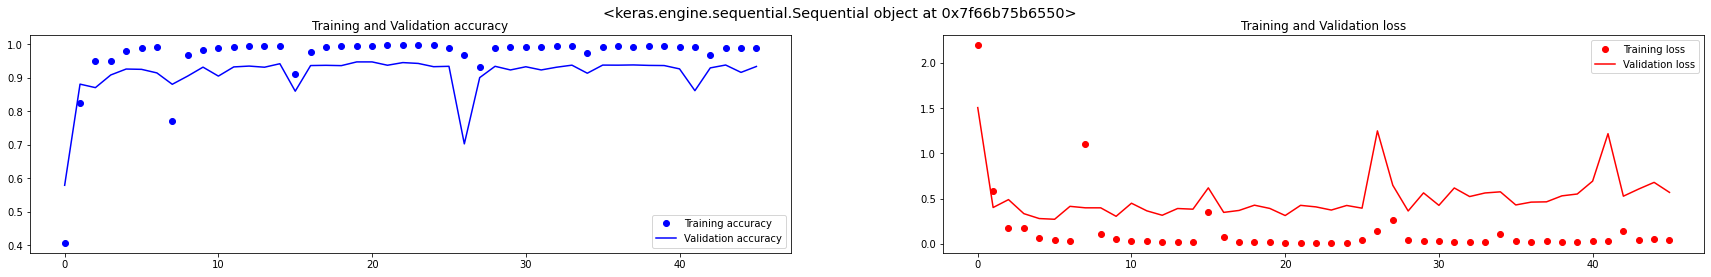

In [ ]:
## displaying details about the history, model, patience, batch size, and epochs.
for a, b, c in zip(patience, batch_size, epochs):
  show_details(
      history = history_nadamax_max,
      model = cnn_nadamax_max,
      patience = a,
      batch_size = b,
      epochs = c
      )

In [ ]:
## evaluating the performance of the cnn_nadamax_max model on the test dataset and print the test accuracy.
score_nadamax_max = cnn_nadamax_max.evaluate(x_test_gray_norm, y_test, verbose = 1)
print('Test accuracy: {:.4f}'.format(score_nadamax_max[1]))

395/395 [==============================] - 1s 2ms/step - loss: 1.1405 - accuracy: 0.9074
Test accuracy: 0.9074


In [ ]:
## calculating the predicted class labels using the cnn_nadamax_max model for the test dataset
predicted_class_nadamax_max = np.argmax(cnn_nadamax_max.predict(x_test_gray_norm), axis = -1)

y_true_nadamax_max = y_test

395/395 [==============================] - 1s 2ms/step


In [ ]:
##  generating a classification report based on the true class labels
print(classification_report(y_true_nadamax_max, predicted_class_nadamax_max))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        60
           1       0.93      0.96      0.95       720
           2       0.93      0.96      0.95       750
           3       0.94      0.85      0.89       450
           4       0.97      0.92      0.94       660
           5       0.86      0.91      0.89       630
           6       0.98      0.79      0.88       150
           7       0.87      0.86      0.87       450
           8       0.89      0.84      0.87       450
           9       0.92      0.96      0.94       480
          10       0.93      0.97      0.95       660
          11       0.87      0.88      0.88       420
          12       0.95      0.96      0.95       690
          13       0.99      0.97      0.98       720
          14       1.00      0.86      0.92       270
          15       0.91      0.97      0.94       210
          16       0.95      0.98      0.97       150
          17       0.99    

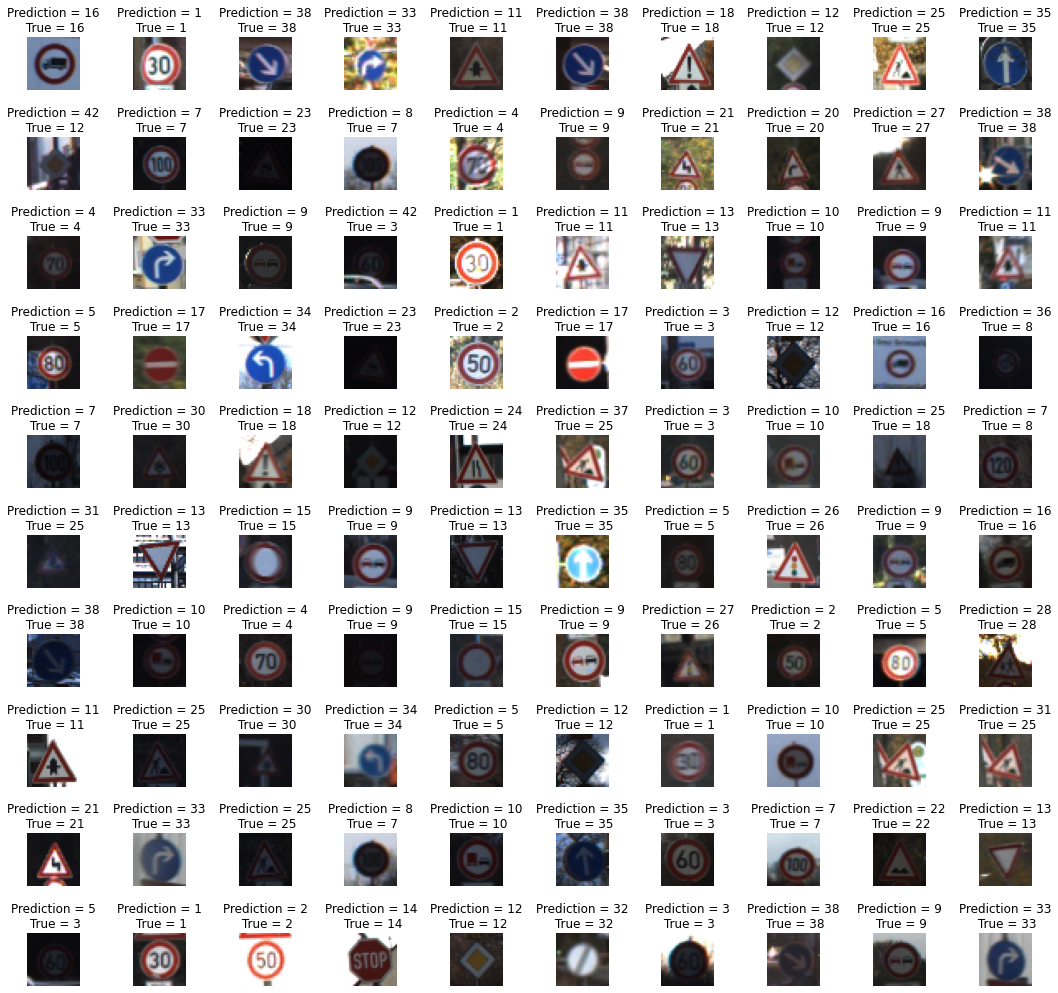

In [ ]:
##  displaying a grid of images from the x_test dataset along with the corresponding predicted class label
L = 10
W = 10

fig, axes = plt.subplots(L, W, figsize = (18, 18))
axes = axes.ravel()

for i in np.arange(0, L * W):
  axes[i].imshow(x_test[i])
  axes[i].set_title("Prediction = {}\n True = {}".format(predicted_class_nadamax_max[i], y_true_nadamax_max[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace = 1)

## Conclusion

1. In this dataset we were supposed to find the most fitting parameters to our models so that it could predict more precisely our traffic signs.
2. By adding GridSearchCV to our CNN model training we were able to find most fitting parameters, to ensure that training accuracy would be higher than 90 percent. Furthermore, there were cases where some models accuracy was around 91 percent.
3. As we could train a lot more models and could apply more sophisticated, different ways, but as we used free version of google colab. It did not let us use more sophisticated ways as it stopped training after some time. Maybe changing verbose to 0 or giving less parameters could fix the issue.
4. In this dataset before training we converted our RGB images into grayscale, as it would make it easier and compact to train our model. However, on the other case I tried to train it with RGB images without converting them and applied ResUNet50.